## <div class="alert alert-danger">Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import os
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## <div class="alert alert-danger">Reading Image Data</div>

In [2]:
arborio =r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset/Arborio"
basmati =r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset/Basmati"
ipsala =r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset/Ipsala"
jasmine =r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset/Jasmine"
karacadag =r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset/Karacadag"

In [3]:
arborio_img = os.listdir(arborio)
basmati_img = os.listdir(basmati)
ipsala_img = os.listdir(ipsala)
jasmine_img = os.listdir(jasmine)
karacadag_img = os.listdir(karacadag)

In [4]:
len(arborio_img)

15000

In [5]:
len(basmati_img)

15000

In [6]:
len(ipsala_img)

15000

In [7]:
len(jasmine_img)

15000

In [8]:
len(karacadag_img)

15000

## <div class="alert alert-danger">Visualization Cell Image </div>

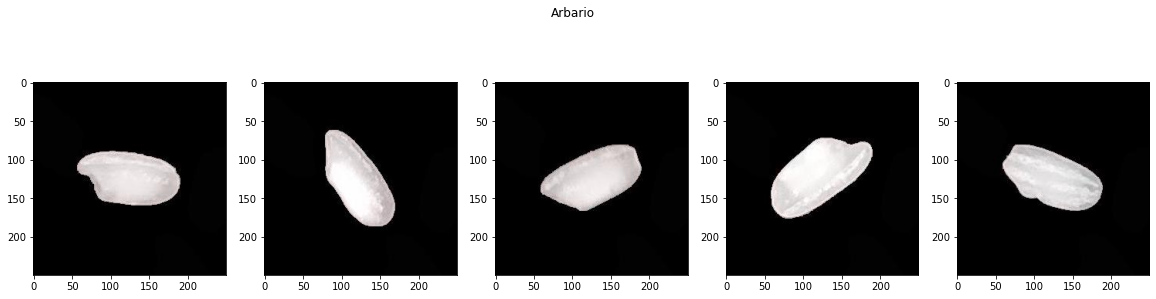

In [9]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Arbario')
for i in range(5):
    img1=cv2.imread(arborio + '\\' + arborio_img[i])
    ax[i].imshow(img1)
plt.show()

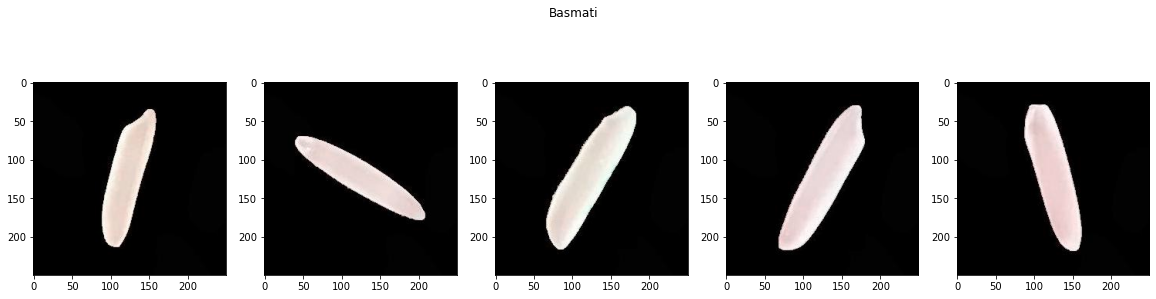

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Basmati')
for i in range(5):
    img2=cv2.imread(basmati + '\\' + basmati_img[i])
    ax[i].imshow(img2)
plt.show()

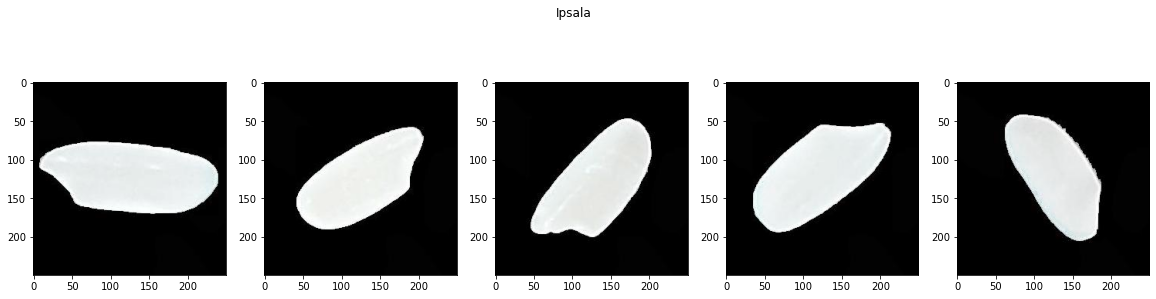

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Ipsala')
for i in range(5):
    img3=cv2.imread(ipsala + '\\' + ipsala_img[i])
    ax[i].imshow(img3)
plt.show()

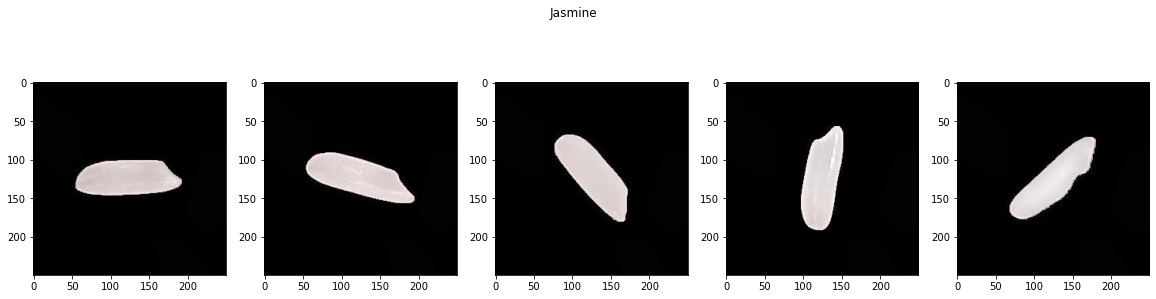

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Jasmine')
for i in range(5):
    img4=cv2.imread(jasmine + '\\' + jasmine_img[i])
    ax[i].imshow(img4)
plt.show()

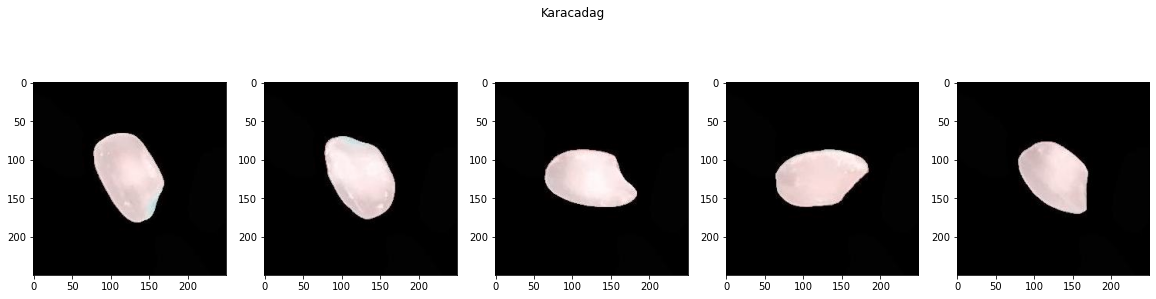

In [13]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Karacadag')
for i in range(5):
    img5=cv2.imread(karacadag + '\\' + karacadag_img[i])
    ax[i].imshow(img5)
plt.show()

In [14]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2) #split and reshape the cell images

In [ ]:
# prepare train and test data, label automatically 

In [15]:
trainDatagen = datagen.flow_from_directory(directory=r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset",
                                           target_size=(50,50),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           subset='training')

Found 60000 images belonging to 5 classes.


In [16]:
trainDatagen.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [17]:
valDatagen = datagen.flow_from_directory(directory=r"C:\Users\T\Documents\AIyapayzeka\Kaggle/RiceImageDataset/Rice_Image_Dataset",
                                           target_size=(50,50),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           subset='validation')

Found 15000 images belonging to 5 classes.


In [18]:
valDatagen.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

## <div class="alert alert-danger">CNN Model</div>

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(trainDatagen,validation_data=valDatagen,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 665s 353ms/step - loss: 0.1882 - accuracy: 0.9352 - val_loss: 0.0751 - val_accuracy: 0.9717
Epoch 2/10
1875/1875 [==============================] - 654s 349ms/step - loss: 0.0990 - accuracy: 0.9675 - val_loss: 0.0340 - val_accuracy: 0.9903
Epoch 3/10
1875/1875 [==============================] - 663s 353ms/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.0422 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 657s 350ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0236 - val_accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 662s 353ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0183 - val_accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 668s 356ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0143 - val_accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 673s 359ms/step - loss: 0.0341 - accuracy: 0.9893 - val_

In [22]:
metrics=model.evaluate(valDatagen)

469/469 [==============================] - 48s 102ms/step - loss: 0.0250 - accuracy: 0.9923


In [23]:
print('Accuracy:',metrics[1])

Accuracy: 0.9923333525657654
